# Functions utilized

In [1]:
def univariate(df, sample=500):
    import pandas as pd
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                       'median', 'max', 'mode', 'mean', 'std', 'skew'])

    for col in df:
        dtype = df[col].dtype
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode().iloc[0]
        except:
            mode = None

        if pd.api.types.is_numeric_dtype(df[col]):
            min_ = df[col].min()
            max_ = df[col].max()
            mean = df[col].mean()
            median = df[col].median()
            std = df[col].std()
            skew = df[col].skew()
            df_results.loc[col] = ['-', dtype, missing, unique, min_, median, max_, mode,
                                   round(mean, 2), round(std, 2), round(skew, 2)]
        else:
            try:
                flag = df[col].value_counts(normalize=True).lt(0.05).sum()
            except:
                flag = None
            df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

    # Countplots: categorical or binary features
    countplots = df_results[(df_results['type'] == 'object') | (df_results['unique'] == 2)]

    # Histograms: numeric with more than 2 unique values
    histograms = df_results[
        (df_results['type'].isin(['float64', 'int64'])) &
        (df_results['unique'].astype(float) > 2)
    ]

    # Plot countplots
    n = countplots.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        ax = ax.flatten() if n > 1 else [ax]
        for i, col in enumerate(countplots.index):
            try:
                sns.countplot(data=df, x=col, color='g', ax=ax[i])
                ax[i].set_ylabel('')
                ax[i].tick_params(labelrotation=90, left=False)
                ax[i].xaxis.set_label_position('top')
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Countplot error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    # Plot histograms
    n = histograms.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        
        if isinstance(ax, (np.ndarray, list)):
            ax = ax.flatten() if hasattr(ax, 'flatten') else list(ax)
        else:
            ax = [ax]

        for i, col in enumerate(histograms.index):
            try:
                sns.histplot(data=df.sample(n=min(sample, len(df)), random_state=1), x=col, color='b', ax=ax[i], kde=True)
                ax[i].set_ylabel('')
                ax[i].tick_params(left=False)
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Histogram error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    return df_results

In [2]:
import pandas as pd


def bin_categories(df: pd.DataFrame, colsToBin=[], cutoff=0.05, messages=True, replace_with='Other'):
    import pandas as pd

    # If no cols specified, apply to all columns
    if len(colsToBin) == 0: colsToBin = df.columns

    for col in colsToBin:
        if not pd.api.types.is_numeric_dtype(df[col]):
            if messages: print("Categorical")
            # Measure % of group values
            # Filter out all groups that represent counts that are < cutoff %
            # Change remaining group occurrences to replace_with var

            other_list = df[col].value_counts()[df[col].value_counts() / df.shape[0] < cutoff].index
            df.loc[df[col].isin(other_list), col] = replace_with

        else:
            if messages: print("Non-Categorical")

    return df

# General Data Understanding

In [3]:
import pandas as pd

# Set option to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_movies = pd.read_csv('movies_titles.csv')
df_users = pd.read_csv('movies_users.csv')
df_triple = pd.read_csv('movies_ratings.csv')

display(df_triple.head())
display(df_users.head())
display(df_movies.head())


,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


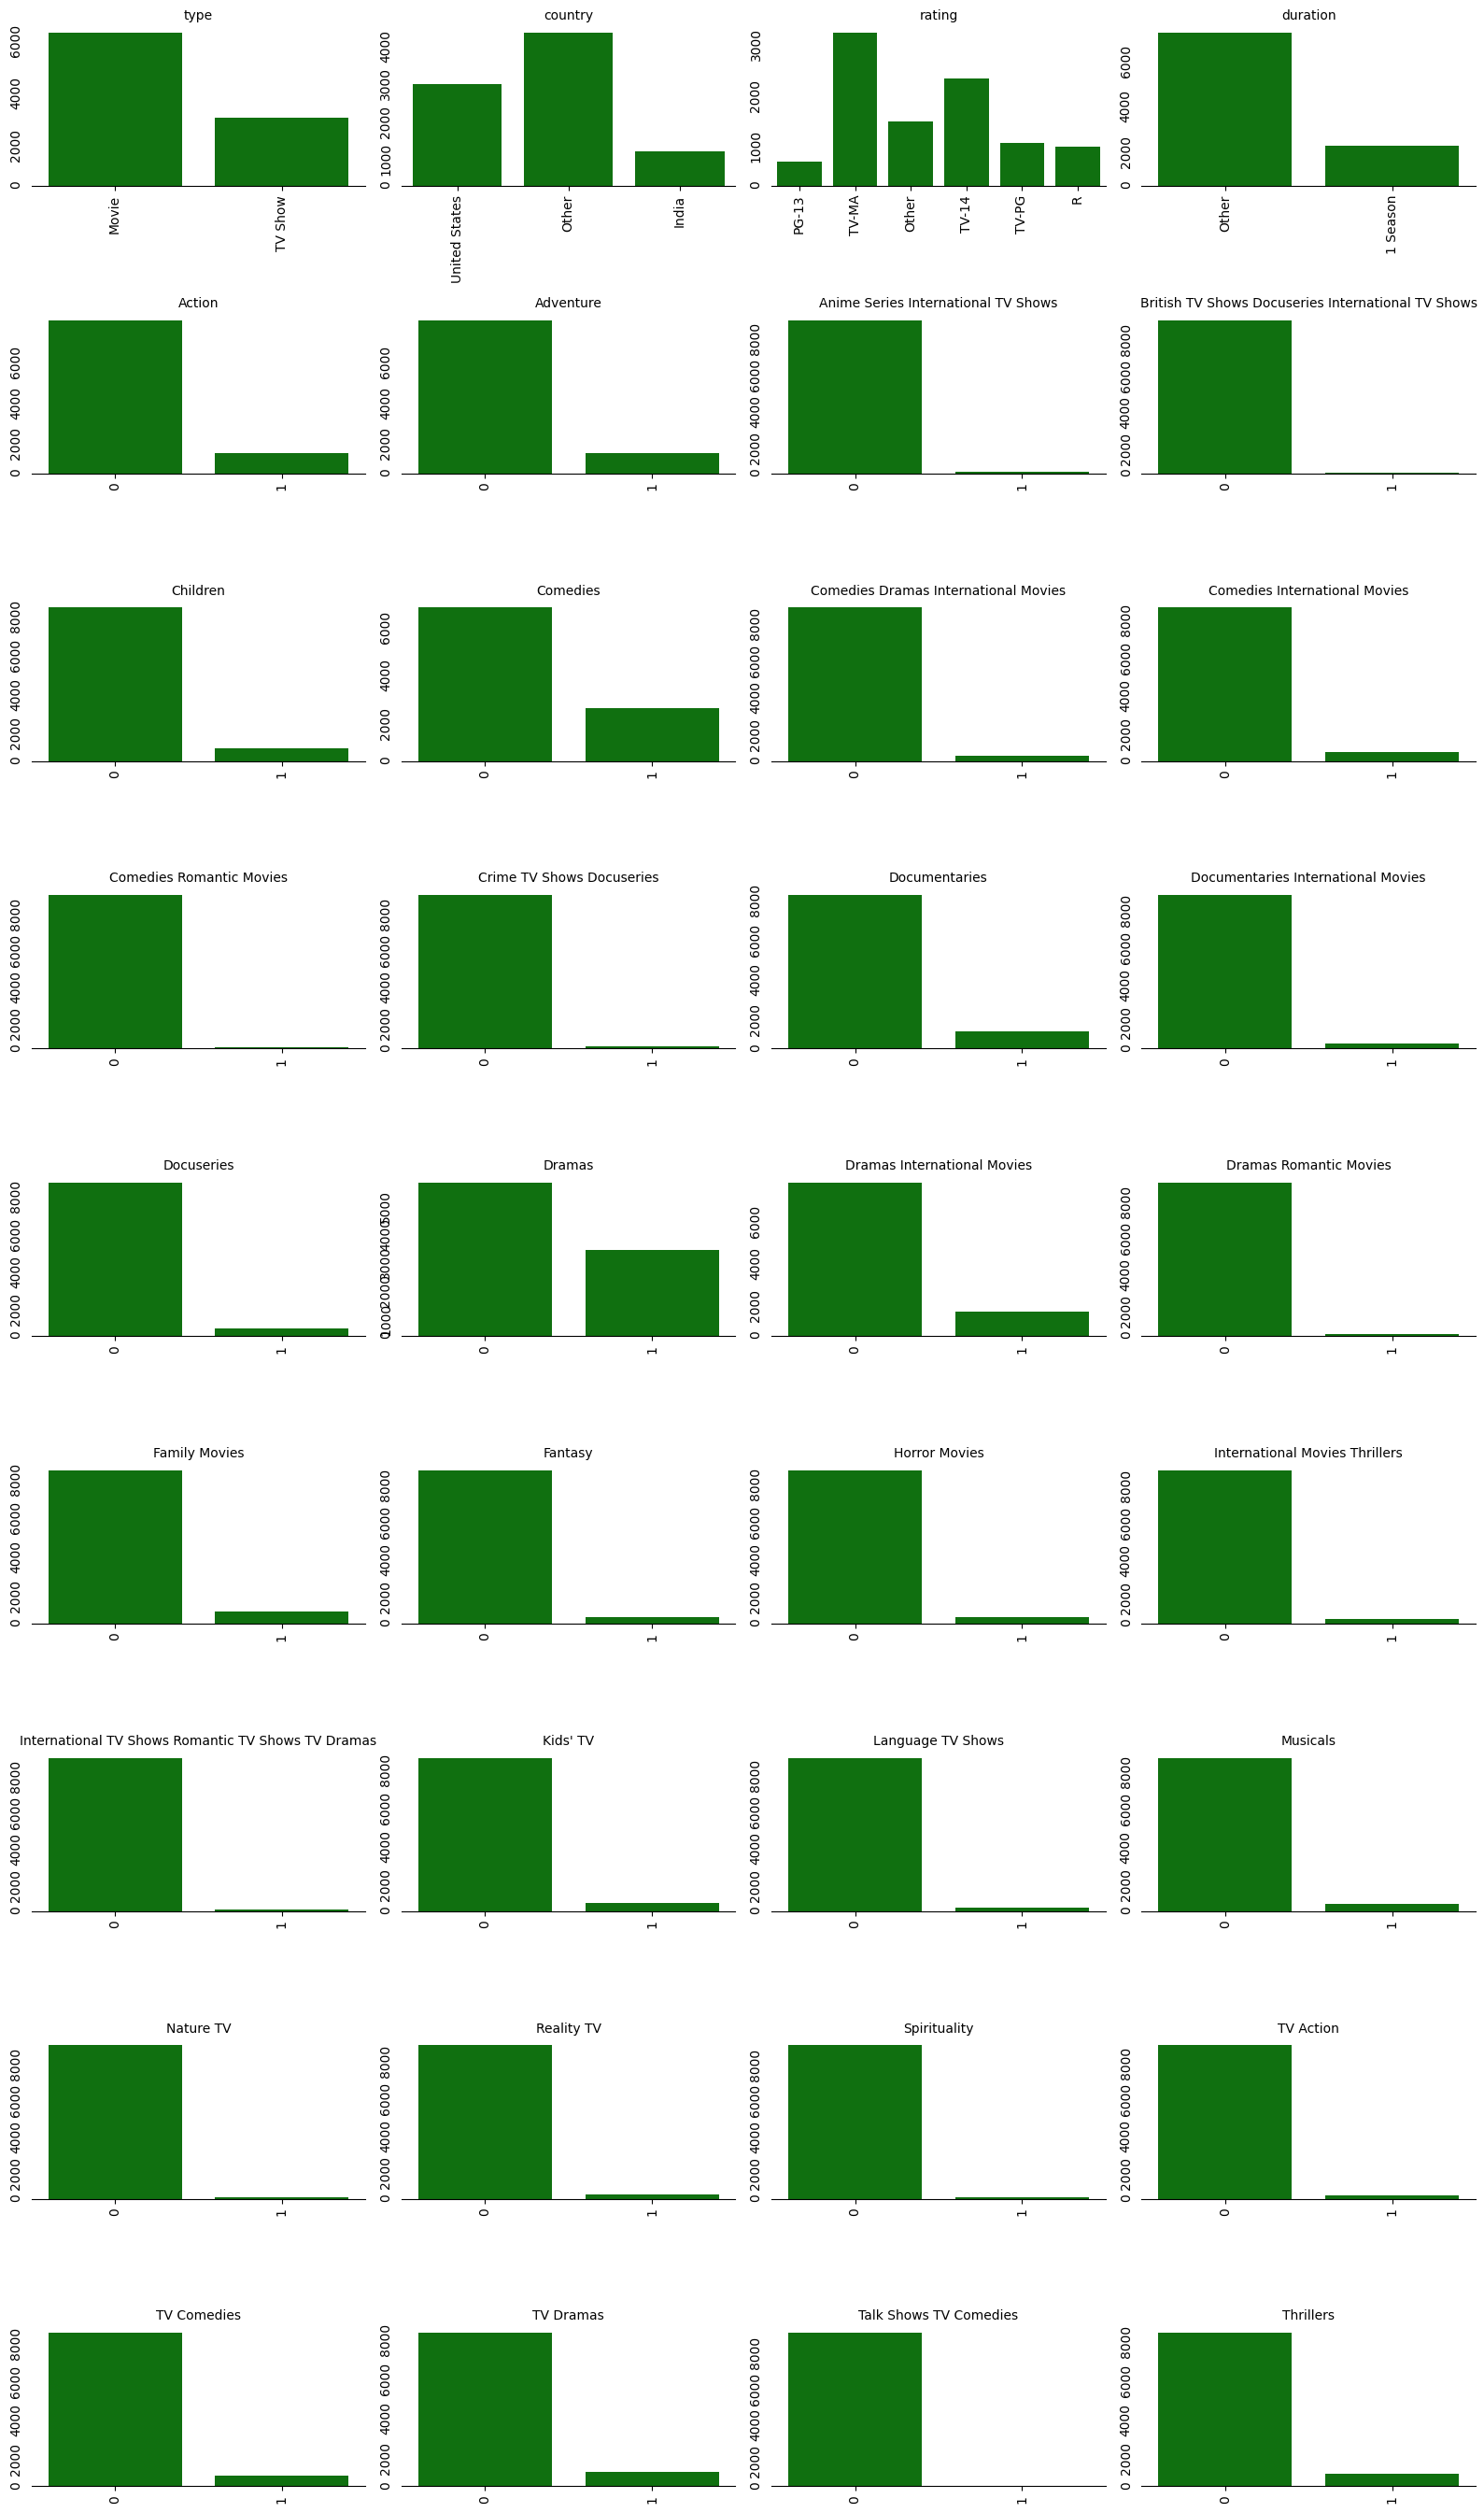

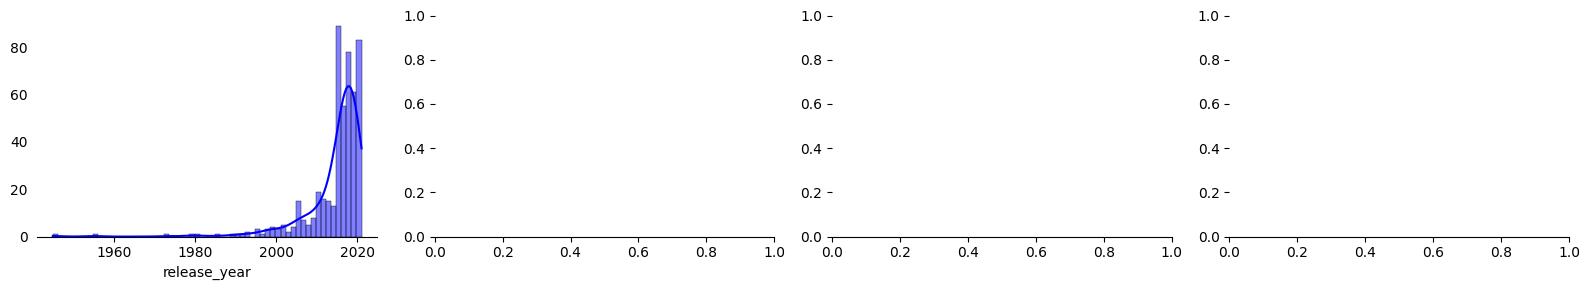

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04
Children,-,int64,0,2,0,0.0,1,0,0.07,0.26,3.23


In [4]:
bin_categories(df_movies, messages=False, colsToBin=['type','country','release_year','rating','duration'])
univariate(df_movies.drop(columns=['genre','show_id', 'title','director','cast','description']))

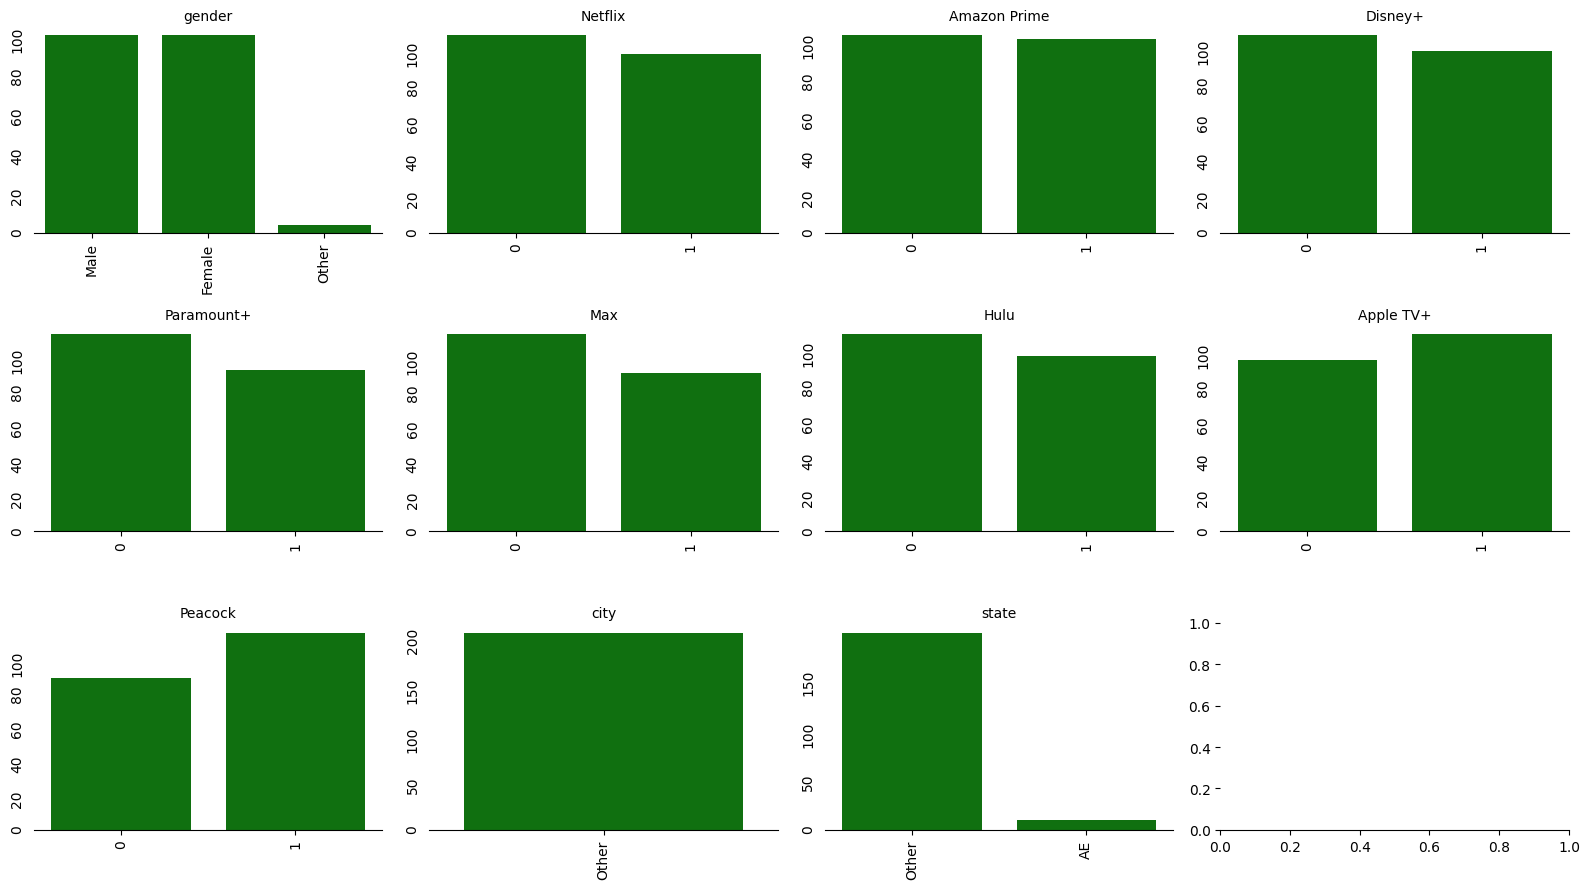

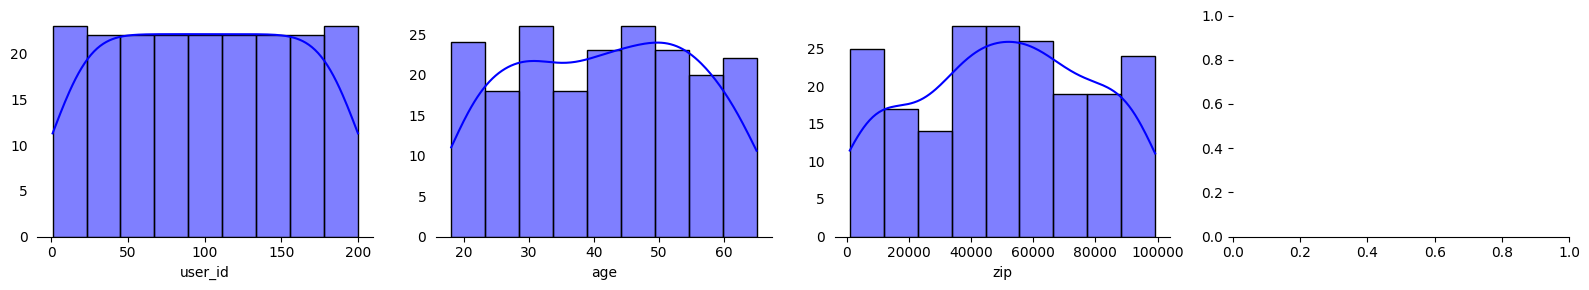

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
user_id,-,int64,0,200,1,100.5,200,1,100.5,57.88,0.0
age,-,int64,0,47,18,42.0,65,30,41.61,13.54,-0.03
gender,1,object,0,3,-,-,-,Female,-,-,-
Netflix,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.1
Amazon Prime,-,int64,0,2,0,0.0,1,0,0.5,0.5,0.02
Disney+,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.08
Paramount+,-,int64,0,2,0,0.0,1,0,0.45,0.5,0.2
Max,-,int64,0,2,0,0.0,1,0,0.44,0.5,0.22
Hulu,-,int64,0,2,0,0.0,1,0,0.47,0.5,0.12
Apple TV+,-,int64,0,2,0,1.0,1,1,0.54,0.5,-0.14


In [5]:
bin_categories(df_users, messages=False)
univariate(df_users.drop(columns=['name','phone','email']))

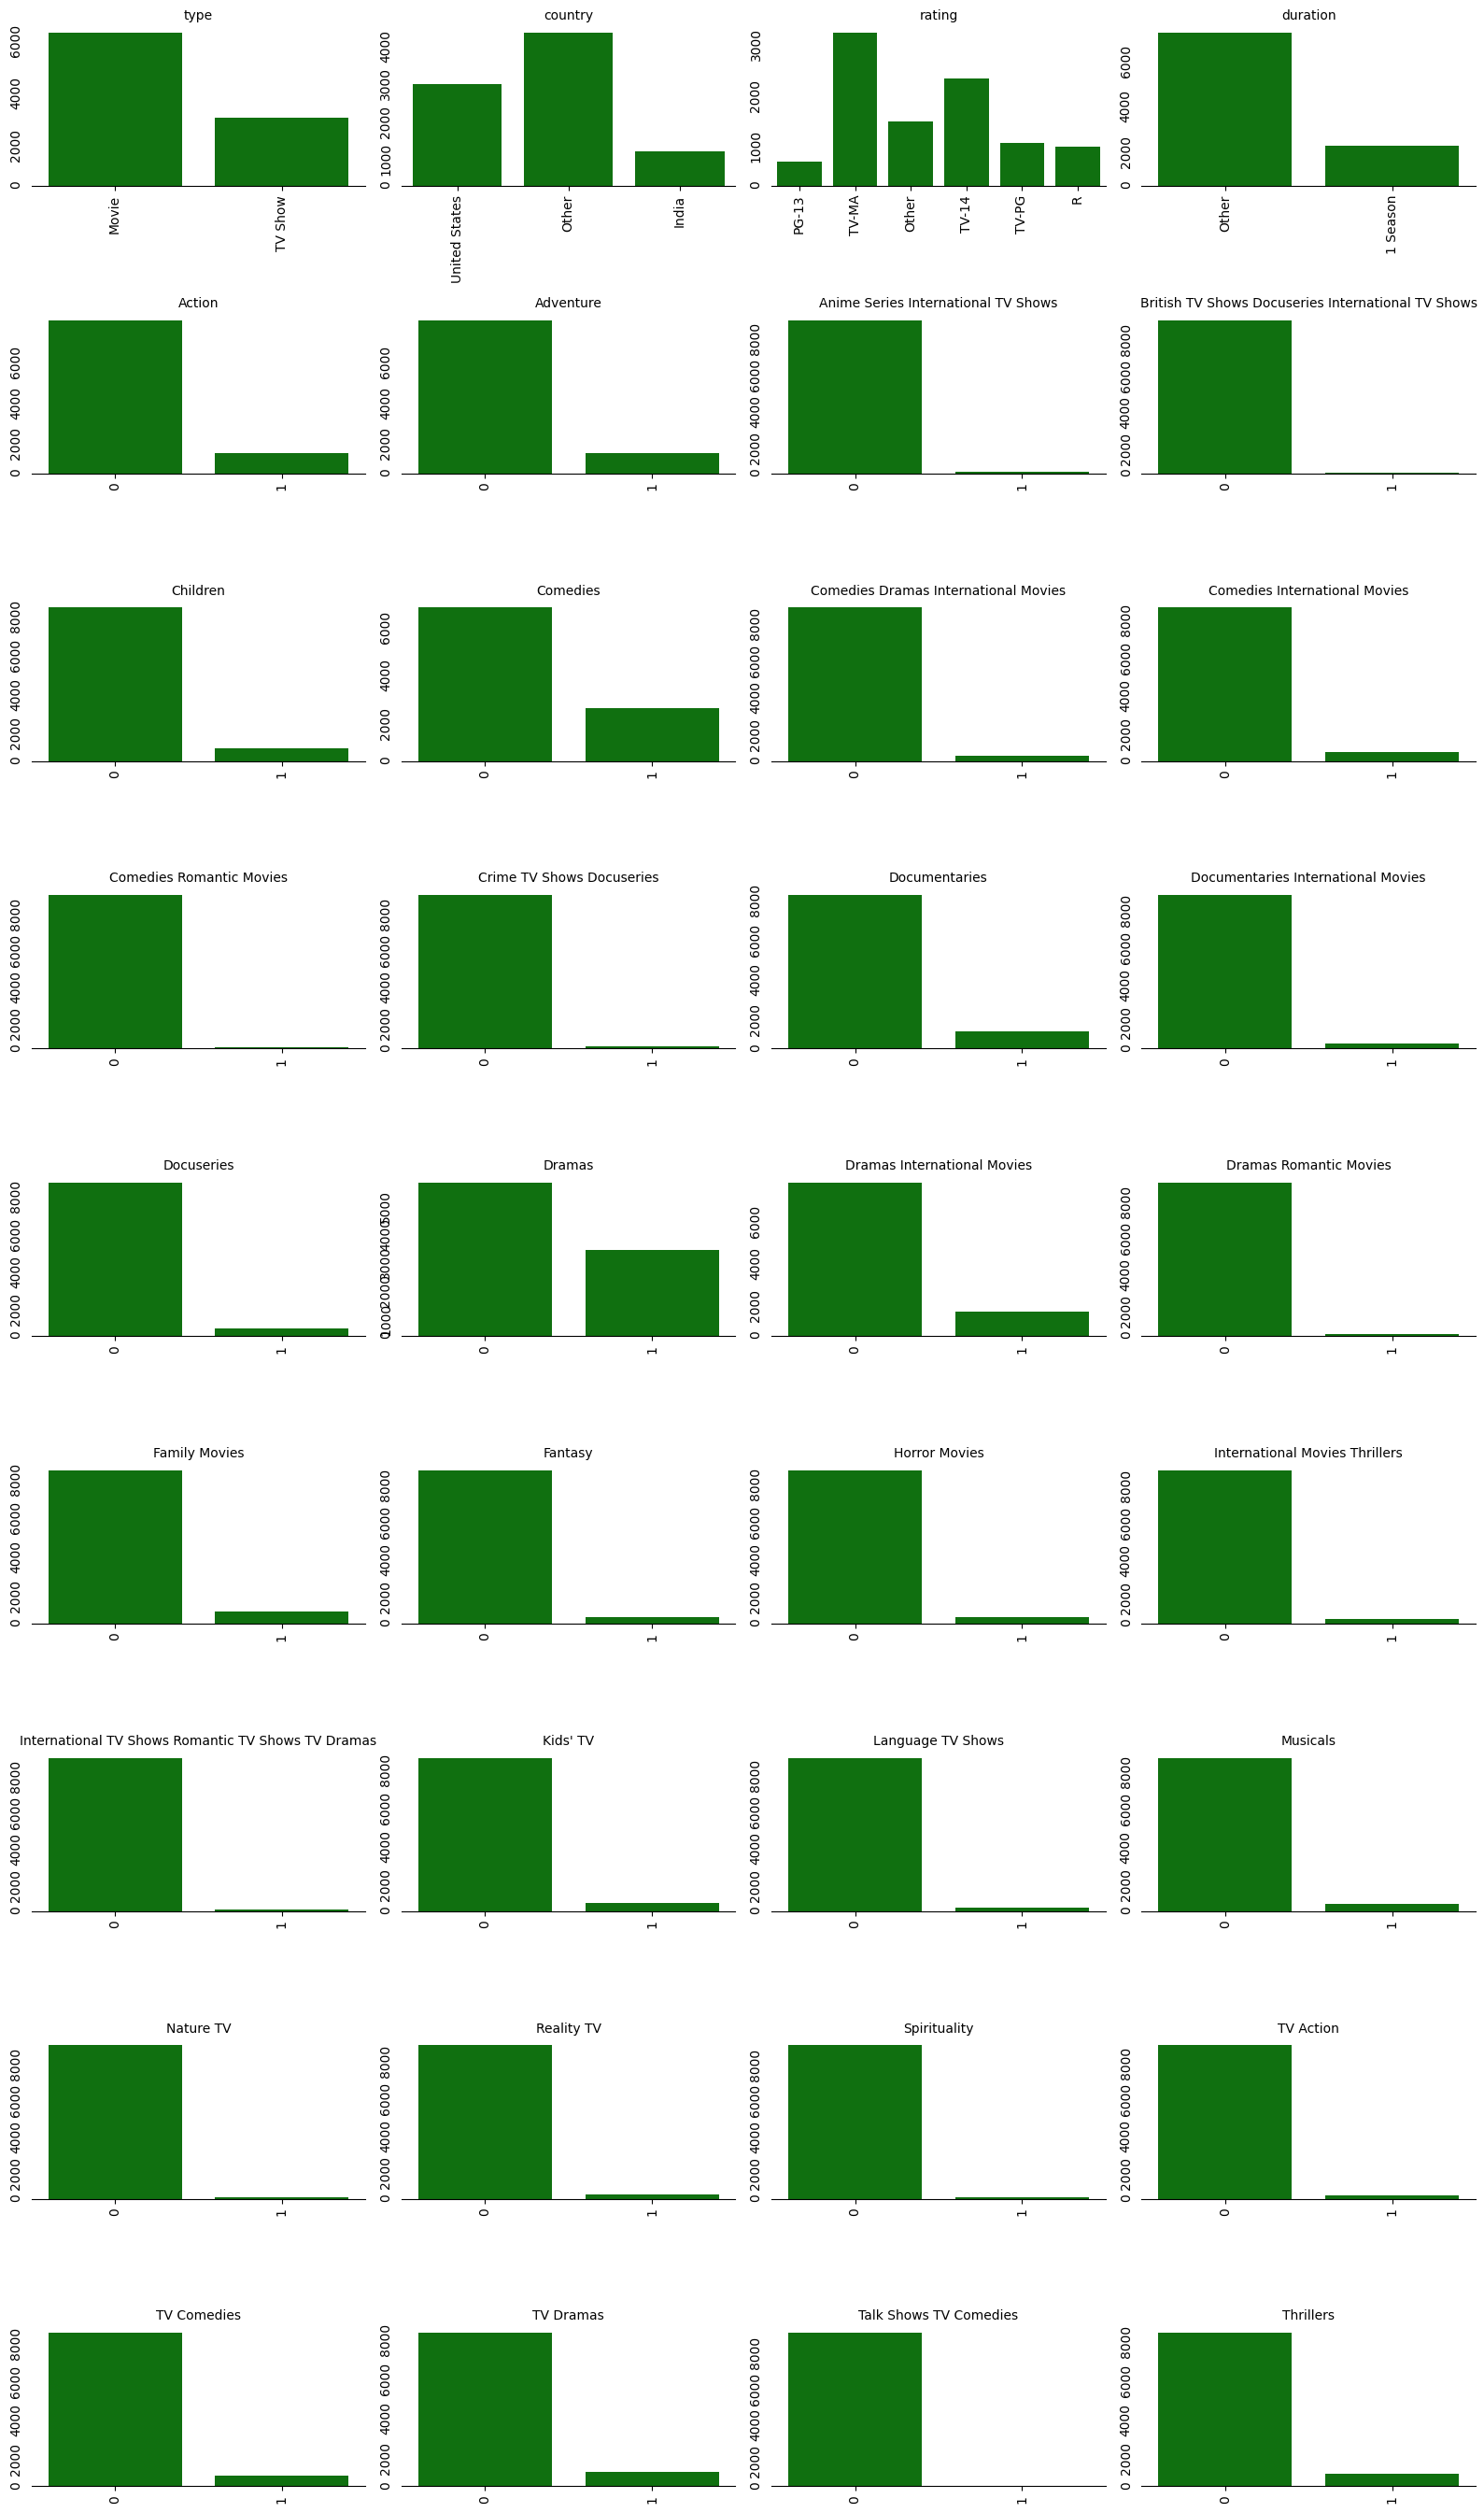

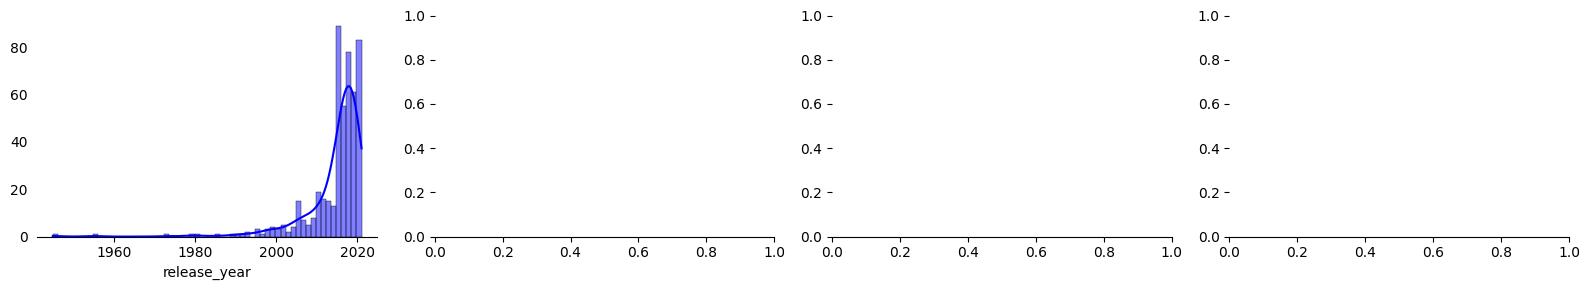

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04
Children,-,int64,0,2,0,0.0,1,0,0.07,0.26,3.23


In [6]:
def missing_drop(df, label, row_thresh=0.7, col_thresh=0.9, drop_all=False):
  # Drop any row that has a missing label
  df.dropna(axis='rows', subset=[label], inplace=True)

  # Drop rows and columns have are 100% missing
  df.dropna(axis='columns', thresh=1, inplace=True)
  df.dropna(axis='rows', thresh=1, inplace=True)

  # Drop rows and columns that are below the thresholds
  df.dropna(axis='columns', thresh=round(df.shape[0] * row_thresh), inplace=True)
  df.dropna(axis='rows', thresh=round(df.shape[1] * col_thresh), inplace=True)

  # If you don't want to leave anything behind to impute:
  if drop_all:
    df.dropna(axis='rows', inplace=True)

  return df

missing_drop(df=df_movies, label='title')

univariate(df_movies.drop(columns=['genre', 'show_id', 'title','director','cast','description']))

# Modeling

## Generic Collaborative Filtering Model


In [7]:
df_triple.sort_values(by=['user_id','show_id','rating'], inplace=True)
df_triple.head()

,user_id,show_id,rating
7,1,s2361,3
10,1,s242,3
5,1,s2917,3
3,1,s294,3
2,1,s3181,4


In [8]:
from sqlalchemy import create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')


# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

query = "SELECT * FROM movies_ratings"
df_triple_db = pd.read_sql(query, engine)
df_triple_db.head()

df_triple = df_triple_db

### Data Understanding

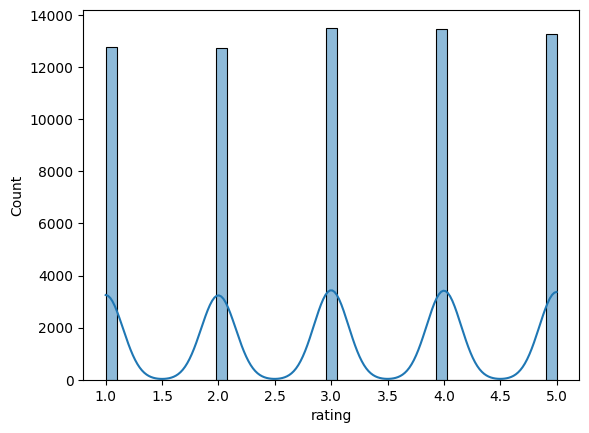

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x='rating', kde=True);

In [10]:
n_ratings = len(df_triple)
n_movies = len(df_triple['show_id'].unique())
n_users = len(df_triple['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 65771
Number of unique movieId's: 8508
Number of unique users: 200
Average ratings per user: 328.86
Average ratings per movie: 7.73


In [11]:
df_triple['show_id'].value_counts()

show_id
s7647    31
s7506    28
s8175    26
s3282    26
s7505    26
s6508    26
s7656    25
s7379    25
s7466    24
s7511    24
s7439    23
s7544    23
s7613    23
s7417    23
s7436    23
s5357    23
s7748    23
s640     23
s7623    22
s7500    22
s3852    22
s7531    22
s7589    22
s3765    22
s2418    22
s7641    22
s7572    22
s7522    22
s8804    22
s7526    21
s8528    21
s8545    21
s4525    21
s1818    21
s6162    21
s2087    21
s7365    20
s7578    20
s7487    20
s7580    20
s7730    20
s7489    20
s7366    20
s7608    20
s7609    20
s7369    20
s7403    20
s7648    20
s7527    20
s2123    20
s7576    20
s7490    20
s7534    20
s7351    20
s7550    20
s246     20
s7357    20
s7553    20
s7507    20
s7651    20
s2932    20
s7564    20
s7362    20
s7566    20
s7567    20
s7492    20
s7575    20
s2942    20
s7636    20
s7524    20
s3921    20
s7377    20
s1941    20
s401     20
s7449    20
s7433    20
s7432    20
s4901    20
s7451    20
s7519    20
s7411    20
s1119    20
s2125   

In [12]:
print('Min:\t\t', df_triple['show_id'].value_counts().min())
print('Quartile 1:\t', df_triple['show_id'].value_counts().quantile(.25))
print('Median:\t\t', df_triple['show_id'].value_counts().quantile(.5))
print('Quartile 3:\t', df_triple['show_id'].value_counts().quantile(.75))
print('Max:\t\t', df_triple['show_id'].value_counts().max())

Min:		 3
Quartile 1:	 5.0
Median:		 7.0
Quartile 3:	 10.0
Max:		 31


### Data Prep


In [13]:
# Store the count of ratings for each movie
value_counts = df_triple['show_id'].value_counts()

# Make a list of those with 2 or more ratings
# Over 75% of the movies have only 1 rating
# TODO decide how many counts to run
keep_list = value_counts[value_counts >= 1]
print(len(keep_list), 'movies with at least 1 rating\n')
keep_list

8508 movies with at least 1 rating



show_id
s7647    31
s7506    28
s8175    26
s3282    26
s7505    26
s6508    26
s7656    25
s7379    25
s7466    24
s7511    24
s7439    23
s7544    23
s7613    23
s7417    23
s7436    23
s5357    23
s7748    23
s640     23
s7623    22
s7500    22
s3852    22
s7531    22
s7589    22
s3765    22
s2418    22
s7641    22
s7572    22
s7522    22
s8804    22
s7526    21
s8528    21
s8545    21
s4525    21
s1818    21
s6162    21
s2087    21
s7365    20
s7578    20
s7487    20
s7580    20
s7730    20
s7489    20
s7366    20
s7608    20
s7609    20
s7369    20
s7403    20
s7648    20
s7527    20
s2123    20
s7576    20
s7490    20
s7534    20
s7351    20
s7550    20
s246     20
s7357    20
s7553    20
s7507    20
s7651    20
s2932    20
s7564    20
s7362    20
s7566    20
s7567    20
s7492    20
s7575    20
s2942    20
s7636    20
s7524    20
s3921    20
s7377    20
s1941    20
s401     20
s7449    20
s7433    20
s7432    20
s4901    20
s7451    20
s7519    20
s7411    20
s1119    20
s2125   

In [14]:
print(df_triple.shape)
df_triple = df_triple.loc[df_triple['show_id'].isin(keep_list.index)]
print(df_triple.shape)
print("Ratings per movie:\t", df_triple.shape[0]/len(keep_list))

(65771, 3)
(65771, 3)
Ratings per movie:	 7.730488951574988


In [15]:
duplicate_ratings = df_triple.duplicated(subset=['user_id', 'show_id']).sum()
print(f"Duplicate ratings: {duplicate_ratings}")

if duplicate_ratings > 0:
    print(f'Total rows before dropping duplicates: {df_triple.shape[0]}')

    # keep='last' if you want to keep the last record
    # keep=False if you want to drop all duplicates
    df_triple.drop_duplicates(subset=['user_id', 'show_id'], keep='first', inplace=True)

    # These print statements are just a 'sanity check' to make sure we truly didn't have duplicates
    print(f'Total rows after dropping duplicates: {df_triple.shape[0]}')

Duplicate ratings: 3244
Total rows before dropping duplicates: 65771
Total rows after dropping duplicates: 62527


,user_id,show_id,rating
0,121,s1041,2
1,173,s1041,4
2,112,s1041,1
3,187,s1041,2
4,135,s2055,1


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,Other,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,Other,2021,TV-MA,Other,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,Other,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


         ratings_count  ratings_mean
show_id                             
s1                  10      2.400000
s10                  6      3.333333
s100                 6      3.000000
s1000                4      3.250000
s1001                4      4.000000
s1002                8      3.000000
s1003                5      3.200000
s1004               15      2.933333
s1005               11      3.000000
s1006                7      3.428571
s1007                9      2.777778
s1008                3      3.333333
s1009                3      3.666667
s101                 6      2.666667
s1010                3      3.000000
s1011               10      2.400000
s1012                8      3.000000
s1013                9      3.555556
s1014                4      3.000000
s1015                3      4.000000
s1016                3      1.333333
s1017                9      3.111111
s1018                5      3.400000
s1019                3      3.666667
s102                10      3.300000
s

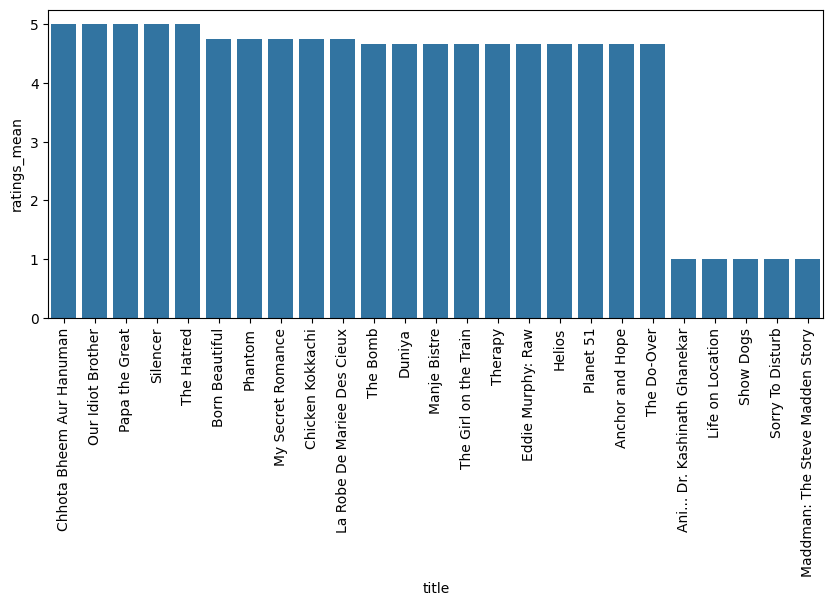

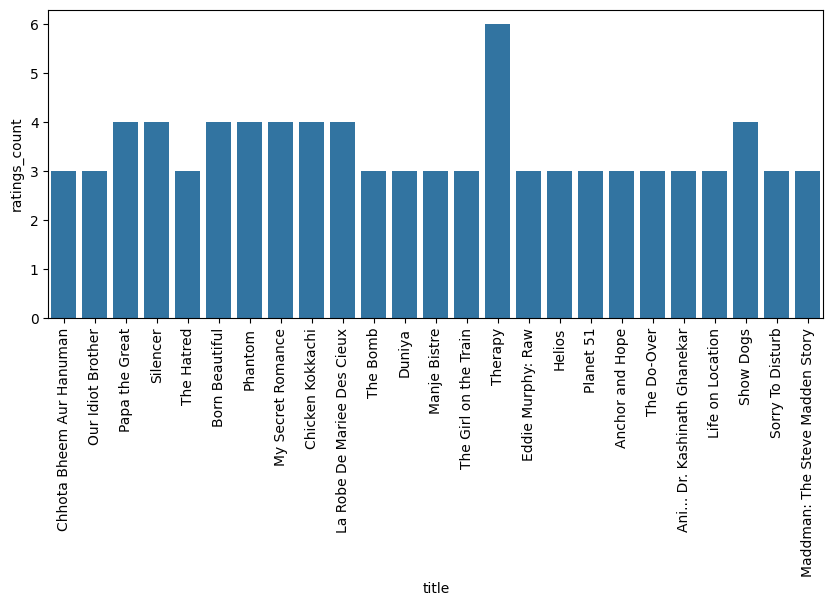

In [16]:
display(df_triple.head())
display(df_movies.head())

# Group the rows into individual titles and calculate the mean rating for each row
movie_stats = df_triple.groupby(by=['show_id'])[['rating']].agg(['count', 'mean'])
movie_stats.columns = ['ratings_count', 'ratings_mean'] # Rename the columns to simplify the index

# Join with df_movies to get the titles
print(movie_stats)
df_movies_indexed = df_movies.set_index('show_id')
movie_stats = movie_stats.join(df_movies_indexed['title'])

# Sort the ratings
movie_stats = movie_stats.sort_values(by=['ratings_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([movie_stats.head(20), movie_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_count')
plt.xticks(rotation=90)
plt.show()

### Modeling Prep

In [17]:
import numpy as np
from scipy.sparse import csr_matrix

U = df_triple['user_id'].nunique()   # Number of users for the matrix
I = df_triple['show_id'].nunique()  # Number of items for the matrix

# Map user and movie IDs to matrix indices
user_mapper = dict(zip(np.unique(df_triple['user_id']), list(range(U))))
item_mapper = dict(zip(np.unique(df_triple['show_id']), list(range(I))))

# Map maxtrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple['user_id'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple['show_id'])))

# Create a list of index values for the csr_matrix for users and movies
user_index = [user_mapper[i] for i in df_triple['user_id']]
item_index = [item_mapper[i] for i in df_triple['show_id']]

# Build the final matrix which will look like: (movieId, userId) rating
X = csr_matrix((df_triple['rating'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of items: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Number of users: 200
Number of items: 8508
user_mapper:	 200   keys:values {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int6

In [18]:
def create_matrix(df, user, item, rating):
    import numpy as np
    from scipy.sparse import csr_matrix

    U = df[user].nunique()  # Number of users for the matrix
    I = df[item].nunique()  # Number of items for the matrix

    # Map user and movie IDs to matrix indices
    user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
    item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

    # Map matrix indices back to IDs
    user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
    item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

    # Create a list of index values for the csr_matrix for users and movies
    user_index = [user_mapper[i] for i in df[user]]
    item_index = [item_mapper[i] for i in df[item]]

    # Build the final matrix which will look like: (movieId, userId) rating
    X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [19]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'user_id', 'show_id', 'rating')

print(X) # (movieId, userId)   rating
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 62527 stored elements and shape (8508, 200)>
  Coords	Values
  (0, 1)	1
  (0, 16)	2
  (0, 17)	1
  (0, 28)	2
  (0, 32)	5
  (0, 57)	3
  (0, 77)	1
  (0, 118)	3
  (0, 154)	4
  (0, 172)	2
  (1, 38)	4
  (1, 45)	5
  (1, 60)	4
  (1, 75)	2
  (1, 153)	4
  (1, 194)	1
  (2, 15)	4
  (2, 53)	2
  (2, 61)	3
  (2, 71)	1
  (2, 141)	5
  (2, 153)	3
  (3, 68)	4
  (3, 86)	2
  (3, 87)	5
  :	:
  (8504, 132)	5
  (8504, 174)	3
  (8504, 187)	4
  (8504, 191)	1
  (8505, 1)	5
  (8505, 26)	5
  (8505, 105)	5
  (8505, 124)	4
  (8505, 148)	5
  (8505, 161)	2
  (8505, 162)	1
  (8505, 189)	2
  (8506, 14)	1
  (8506, 60)	4
  (8506, 93)	5
  (8506, 113)	3
  (8506, 189)	5
  (8507, 56)	4
  (8507, 76)	1
  (8507, 108)	5
  (8507, 125)	3
  (8507, 158)	3
  (8507, 166)	3
  (8507, 167)	4
  (8507, 176)	2
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11):

### Model Fitting

In [20]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    from sklearn.neighbors import NearestNeighbors
    
    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    
    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
    
    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
    
    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances

#### Movie Specific Recommender

In [21]:
movie_id = 's1037'
similar_ids = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
print(f"If you like {movie_title}, you may also enjoy:\n")

for i in similar_ids[0]:
    i_str = str(i)  # Make sure it's a string like 's1037'
    title_match = df_movies.loc[df_movies['show_id'] == i_str, 'title']
    if not title_match.empty:
        title = title_match.values[0]
        print(f"\t{title}")
    else:
        print(f"\t[Title not found for show_id: {i_str}]")

List of recommended item indeces:
[  43 5563  257 7988  739 2439 3554 5789 5319 4925 4012]

List of recommended item IDs:
['s6172', 's1232', 's8441', 's1678', 's3251', 's4292', 's6384', 's5949', 's5576', 's4718']

List of recommended item similarity to selected item:
[0.502584   0.5272912  0.56233227 0.56556791 0.57140626 0.58259516
 0.58671318 0.58738593 0.6020201  0.60919308]

If you like Time Trap, you may also enjoy:

	Ant-Man and the Wasp
	City of Ghosts
	The NSU-Complex
	My Amnesia Girl
	Bikram: Yogi Guru Predator
	Kill the Messenger
	Bruno and Boots: The Wizzle War
	The Ryan White Story
	Cheer Squad
	Dinotrux Supercharged


#### User Specific Recommender

In [22]:
user_id = 150   # Select a user
k = 20          # Select the number of recommendations to give them; movies they've seen will be removed from this total

# Filter the data by only those movies rated by this user
df_user_ratings = df_triple[df_triple['user_id']==user_id]

# Find the movies with the max ratings for this user
max_rating = df_user_ratings['rating'].max()
df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

# Randomly select one of their top rated movies
movie_id = df_favorites.sample(n=1).iloc[0]

# Get a list of recommendations based on their top rated movie
rec_ids, rec_distances = recommend(movie_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper, 
                                    k=k, messages=False)

movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
print(f"If you like {movie_title}, you may also enjoy:\n")
for i in rec_ids:
    if not i in list(df_user_ratings['show_id']): # Make sure we don't recommend movies they have already seen
        title_match = df_movies.loc[df_movies['show_id'] == i, 'title']
        if not title_match.empty:
            print(f"\t{title_match.values[0]}")
        else:
            print(f"\t[Title not found for show_id: {i}]")

If you like In The Deep, you may also enjoy:

	Blackfish
	The Pass
	Lupin the 3rd: The Castle of Cagliostro: Special Edition
	Cop Watchers
	Middleditch & Schwartz
	Seven Pounds
	Monster High: Fright On!
	Atlantics
	Numero Zero. The Roots of Italian Rap
	The Lost Café
	Down The Fence
	Story of an Egg


##### Get all users & recommended movies

In [23]:
k=20
df_user_recs = pd.DataFrame(columns=['Because you rated'], index=df_triple.user_id.unique())

for id in df_triple.user_id.unique():
    # Filter the data by only those movies rated by this user
    df_user_ratings = df_triple[df_triple['user_id']==id]

    # Find the movies with the max ratings for this user
    max_rating = df_user_ratings['rating'].max()
    df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

    # Randomly select one of their top rated movies
    movie_id = df_favorites.sample(n=1).iloc[0]

    # Get a list of recommendations based on their top rated movie
    rec_ids, rec_distances = recommend(movie_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper, 
                                        k=k, messages=False)
    
    # Setup the because you rated column
    movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
    df_user_recs.at[id, 'Because you rated'] = movie_id
    
    rec_titles = []
    for i in rec_ids:
        if i not in list(df_user_ratings['show_id']):  # Avoid already-seen movies
            title_match = df_movies.loc[df_movies['show_id'] == i, 'title']
            if not title_match.empty:
                rec_titles.append(title_match.values[0])
            else:
                rec_titles.append(f"[Title not found for show_id: {i}]")

    # Fill in the recommendation columns
    for j, rec_id in enumerate(rec_ids):
        df_user_recs.at[id, f'Rec {j+1} id'] = rec_id

display(df_user_recs.head())


,Because you rated,Rec 1 id,Rec 2 id,Rec 3 id,Rec 4 id,Rec 5 id,Rec 6 id,Rec 7 id,Rec 8 id,Rec 9 id,Rec 10 id,Rec 11 id,Rec 12 id,Rec 13 id,Rec 14 id,Rec 15 id,Rec 16 id,Rec 17 id,Rec 18 id,Rec 19 id,Rec 20 id
121,s5351,s3294,s4025,s4921,s7993,s5236,s8156,s8754,s1421,s5861,s1981,s5609,s8647,s3789,s2786,s6528,s7214,s930,s4918,s3888,s3917
173,s7848,s5241,s7309,s7663,s8426,s7291,s1181,s855,s5366,s3701,s2462,s5013,s8330,s7232,s430,s5077,s1428,s4852,s5585,s5778,s7783
112,s556,s1861,s8459,s2773,s7426,s14,s3360,s3789,s1619,s2145,s2575,s5161,s6170,s2947,s4244,s5489,s4135,s3354,s8768,s5132,s912
187,s6459,s1573,s8219,s590,s1904,s3300,s8340,s83,s6959,s7950,s6046,s4527,s6009,s200,s3604,s2298,s5323,s5879,s1082,s4113,s5128
135,s8324,s7430,s5724,s384,s4306,s7768,s8179,s4465,s636,s8158,s3257,s8776,s6429,s6255,s1486,s1396,s1056,s4003,s7515,s6602,s2489


In [24]:
from sqlalchemy import String, create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')

# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# df_user_recs = df_user_recs.reset_index().rename(columns={'index': 'show_id'})
df_user_recs.to_sql(
    'user_rating_recommendations', 
    con=engine, 
    if_exists='replace',
    chunksize=1000)

10

##### Get all movies rated & recommended movies

In [25]:
# How many recommendations per movie would you like?
k = 5

# Get a list of recommendations for all movies; you can store this list as a "trained model" of sorts
df_recommendations = pd.DataFrame(columns=['If you watched'], index=item_mapper)

for row in df_recommendations.itertuples():
    # Get a ranked list of recommendati ons
    rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)

    # Get the title of the 'watched' movie in this row
    df_recommendations.at[row[0], 'If you watched'] = df_movies.loc[df_movies['show_id'] == row[0], 'title'].values[0]
    
    # Get the titles of the recommended movies
    for i, r in enumerate(rec_ids):
        # print(rec_ids)
        # df_recommendations.at[row[0], f'Recommendation {i+1}'] = df_movies.at[r, 'title']
        title_match = df_movies.loc[df_movies['show_id'] == r, 'title']
        df_recommendations.at[row[0], f'Rec. {i+1} show_id'] = r
        # if not title_match.empty:
        #     df_recommendations.at[row[0], f'Recommendation {i+1}'] = title_match.values[0]
        # else:
        #     df_recommendations.at[row[0], f'Recommendation {i+1}'] = '[Title not found]'
        

# df_recommendations = df_recommendations[['If you watched','Rec. 1 show_id','Rec. 2 show_id','Rec. 3 show_id','Rec. 4 show_id','Rec. 5 show_id','Recommendation 1','Recommendation 2','Recommendation 3','Recommendation 4','Recommendation 5']]
df_recommendations.tail()

,If you watched,Rec. 1 show_id,Rec. 2 show_id,Rec. 3 show_id,Rec. 4 show_id,Rec. 5 show_id
s995,This Lady Called Life,s1219,s3325,s1946,s7286,s6777
s996,Vizontele,s4532,s544,s6646,s4559,s1286
s997,HOMUNCULUS,s5931,s2928,s7290,s5867,s3279
s998,Life in Color with David Attenborough,s760,s1305,s7757,s1309,s6053
s999,Searching For Sheela,s202,s4417,s6462,s8479,s4374


##### Deploy To Movie Based Recommendations to Azure Database

In [26]:
from sqlalchemy import String, create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')

# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

df_recommendations = df_recommendations.reset_index().rename(columns={'index': 'show_id'})
df_recommendations.to_sql(
    'movie_rating_recommendations', 
    con=engine, 
    if_exists='replace',
    chunksize=1000)

1958

In [27]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

# # Load data
# df_movies = pd.read_csv('movies_titles.csv')
# df_ratings = pd.read_csv('movies_ratings.csv')

# # Create user-item matrix (movies x users)
# X = df_ratings.pivot_table(index='show_id', columns='user_id', values='rating').fillna(0)

# # Sample if the dataset is too large for plotting
# X_sampled = X.sample(n=min(1800, len(X)), random_state=42)

# # Run PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# X_3d = pca.fit_transform(X_sampled)

# # Map sampled movie IDs to their titles
# sampled_ids = X_sampled.index
# movie_lookup = df_movies.set_index('show_id')
# sampled_titles = movie_lookup.loc[sampled_ids, 'title'].fillna('[No Title]').values

# # 3D Plot
# fig = plt.figure(figsize=(14, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot
# sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], alpha=0.75, s=40)

# # Annotate a few points (optional: change range or logic to pick titles)
# for i in range(0, len(sampled_titles), max(1, len(sampled_titles)//30)):
#     ax.text(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], sampled_titles[i], fontsize=8)

# # Labels and title
# ax.set_title('3D PCA Visualization of Movie Embeddings')
# ax.set_xlabel('Similarity 1')
# ax.set_ylabel('Similarity 2')
# ax.set_zlabel('Similarity 3')

# plt.tight_layout()
# plt.show()


In [28]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

# # Load data
# df_movies = pd.read_csv('movies_titles.csv')
# df_ratings = pd.read_csv('movies_ratings.csv')

# # Create user-item matrix (movies x users)
# X = df_ratings.pivot_table(index='show_id', columns='user_id', values='rating').fillna(0)

# # Sample if the dataset is too large for plotting
# X_sampled = X.sample(n=min(800, len(X)), random_state=42)

# # Run PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# X_3d = pca.fit_transform(X_sampled)

# # Map sampled movie IDs to their titles
# sampled_ids = X_sampled.index
# movie_lookup = df_movies.set_index('show_id')
# sampled_titles = movie_lookup.loc[sampled_ids, 'title'].fillna('[No Title]').values

# # 3D Plot
# fig = plt.figure(figsize=(14, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot
# sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], alpha=0.75, s=40)

# # Annotate a few points (optional: change range or logic to pick titles)
# for i in range(0, len(sampled_titles), max(1, len(sampled_titles)//30)):
#     ax.text(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], sampled_titles[i], fontsize=8)

# # Labels and title
# ax.set_title('3D PCA Visualization of Movie Embeddings')
# ax.set_xlabel('Similarity 1')
# ax.set_ylabel('Similarity 2')
# ax.set_zlabel('Similarity 3')

# plt.tight_layout()
# plt.show()


In [29]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

# # Load data
# df_movies = pd.read_csv('movies_titles.csv')
# df_ratings = pd.read_csv('movies_ratings.csv')

# # Create user-item matrix (movies x users)
# X = df_ratings.pivot_table(index='show_id', columns='user_id', values='rating').fillna(0)

# # Sample if the dataset is too large for plotting
# X_sampled = X.sample(n=min(300, len(X)), random_state=1)

# # Run PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# X_3d = pca.fit_transform(X_sampled)

# # Map sampled movie IDs to their titles
# sampled_ids = X_sampled.index
# movie_lookup = df_movies.set_index('show_id')
# sampled_titles = movie_lookup.loc[sampled_ids, 'title'].fillna('[No Title]').values

# # 3D Plot
# fig = plt.figure(figsize=(14, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot
# sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], alpha=0.75, s=40)

# # Annotate a few points (optional: change range or logic to pick titles)
# for i in range(0, len(sampled_titles), max(1, len(sampled_titles)//30)):
#     ax.text(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], sampled_titles[i], fontsize=8)

# # Labels and title
# ax.set_title('3D PCA Visualization of Movie Embeddings')
# ax.set_xlabel('Similarity 1')
# ax.set_ylabel('Similarity 2')
# ax.set_zlabel('Similarity 3')

# plt.tight_layout()
# plt.show()


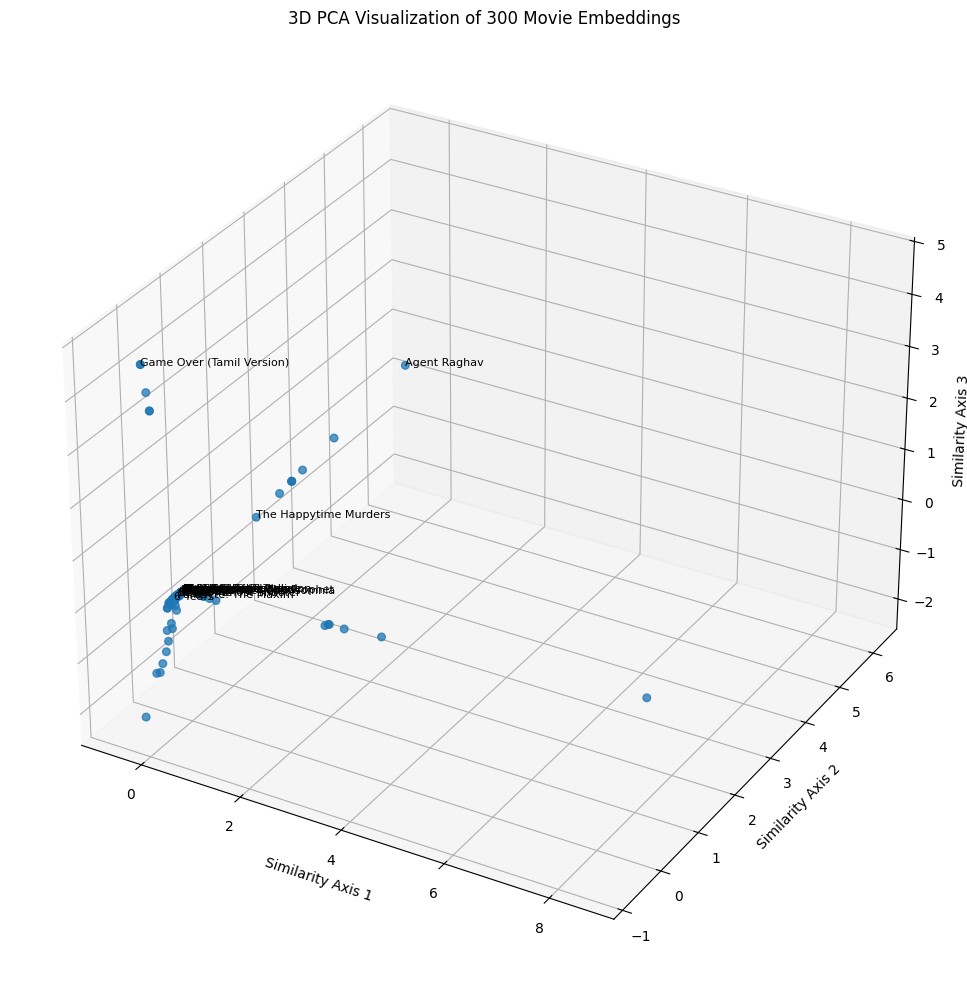

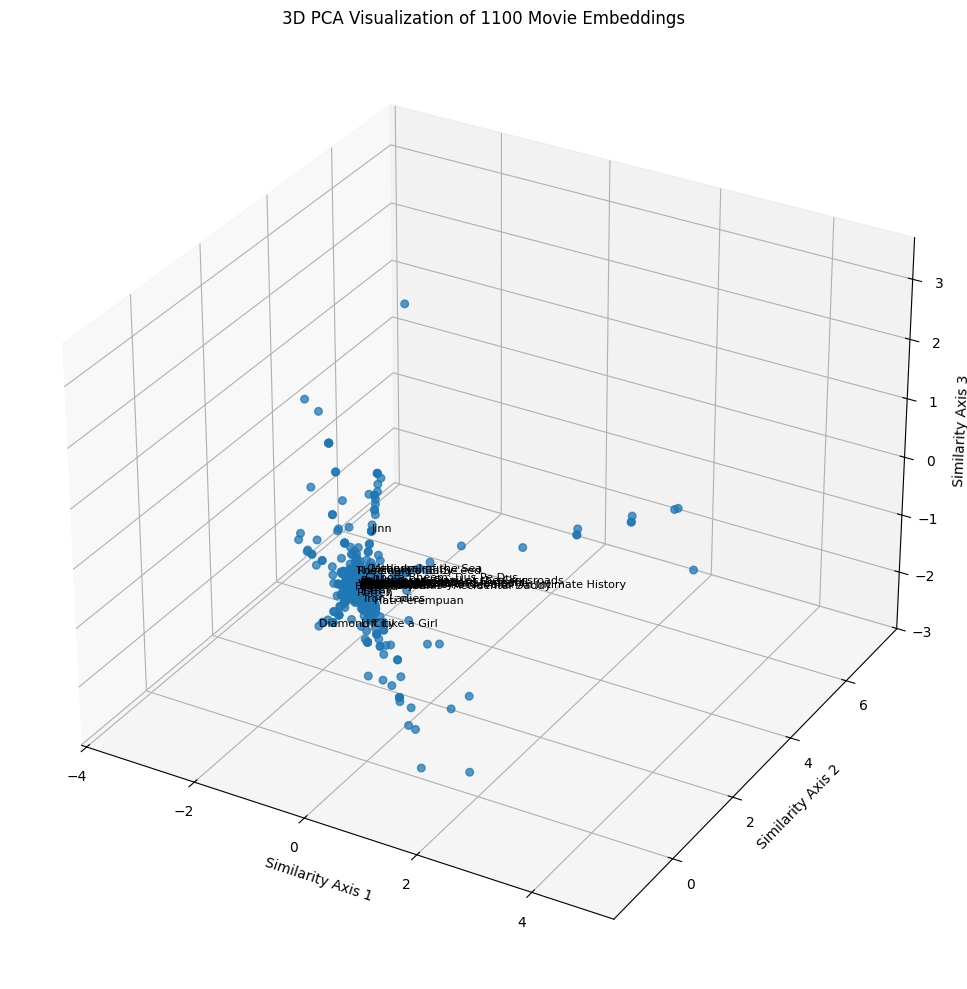

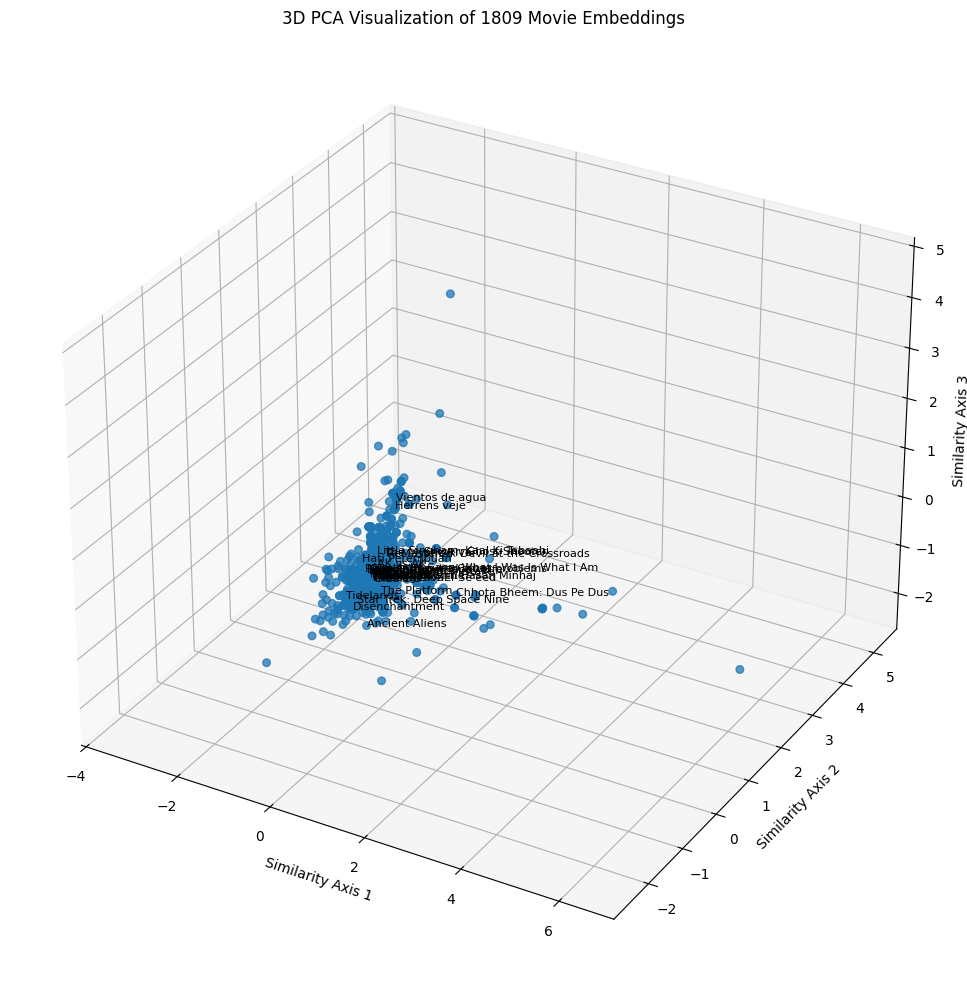

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load your data
df_movies = pd.read_csv('movies_titles.csv')
df_ratings = pd.read_csv('movies_ratings.csv')

# Create user-item matrix (movies x users)
X_full = df_ratings.pivot_table(index='show_id', columns='user_id', values='rating').fillna(0)

# Sample sizes to visualize
sample_sizes = [300, 1100, len(X_full)]

for n in sample_sizes:
    if len(X_full) < n:
        print(f"⚠️ Skipping n={n} because your dataset only has {len(X_full)} movies.")
        continue

    # Sample and apply PCA
    X_sampled = X_full.sample(n=n, random_state=42)
    pca = PCA(n_components=3)
    X_3d = pca.fit_transform(X_sampled)

    # Map sampled movie IDs to titles
    sampled_ids = X_sampled.index
    movie_lookup = df_movies.set_index('show_id')
    sampled_titles = movie_lookup.loc[sampled_ids, 'title'].fillna('[No Title]').values

    # Plot
    fig = plt.figure(figsize=(13, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], alpha=0.75, s=30)

    # Annotate a few titles
    for i in range(0, len(sampled_titles), max(1, len(sampled_titles)//30)):
        ax.text(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], sampled_titles[i], fontsize=8)

    # Label the axes nicely
    ax.set_title(f'3D PCA Visualization of {n} Movie Embeddings')
    ax.set_xlabel('Similarity Axis 1')
    ax.set_ylabel('Similarity Axis 2')
    ax.set_zlabel('Similarity Axis 3')

    plt.tight_layout()
    plt.show()


In [31]:
from sklearn.metrics.pairwise import cosine_distances

# Use your full user-item matrix
X_matrix = X_full.values  # or X_sampled if you're working with a sample

# Compute pairwise cosine distances
dist_matrix = cosine_distances(X_matrix)

# Set self-distances to NaN to avoid skewing averages
np.fill_diagonal(dist_matrix, np.nan)

# Compute average distance to all others for each movie
avg_distances = np.nanmean(dist_matrix, axis=1)

# Get top 10 most isolated (farthest on average)
top_n = 10
most_isolated_indices = np.argsort(avg_distances)[-top_n:]

# Map back to movie IDs and titles
isolated_show_ids = X_full.index[most_isolated_indices]
isolated_titles = df_movies.set_index('show_id').loc[isolated_show_ids, 'title']

# Print results
print("🎯 Top 10 Most Isolated Movies (By Cosine Distance):\n")
for title, dist in zip(isolated_titles, avg_distances[most_isolated_indices]):
    print(f"{title} — Avg. distance: {dist:.4f}")


🎯 Top 10 Most Isolated Movies (By Cosine Distance):

Cheese in the Trap — Avg. distance: 0.9961
Camelia la Texana — Avg. distance: 0.9961
Hap and Leonard — Avg. distance: 0.9962
Taken — Avg. distance: 0.9962
Doctor Foster — Avg. distance: 0.9962
Dating Around: Brazil — Avg. distance: 0.9962
Crashing — Avg. distance: 0.9962
Bangkok Breaking — Avg. distance: 0.9967
Polly Pocket — Avg. distance: 0.9967
Mr. Young — Avg. distance: 0.9967


In [32]:
# Only good if there are lots of ratings
# Get top 10 most *central* (smallest average distance)
top_n = 10
most_central_indices = np.argsort(avg_distances)[:top_n]

# Map back to movie IDs and titles
central_show_ids = X_full.index[most_central_indices]
central_titles = df_movies.set_index('show_id').loc[central_show_ids, 'title']

# Print results
print("💡 Top 10 Most Central Movies (By Cosine Distance):\n")
for title, dist in zip(central_titles, avg_distances[most_central_indices]):
    print(f"{title} — Avg. distance: {dist:.4f}")


💡 Top 10 Most Central Movies (By Cosine Distance):

The Stranded — Avg. distance: 0.9899
Zombie Dumb — Avg. distance: 0.9900
The Next Step — Avg. distance: 0.9904
Club Friday To Be Continued - Friend & Enemy — Avg. distance: 0.9904
The New Legends of Monkey — Avg. distance: 0.9906
Planet Earth II — Avg. distance: 0.9907
Durarara!! — Avg. distance: 0.9913
ThirTEEN Terrors — Avg. distance: 0.9914
Death Can Wait — Avg. distance: 0.9915
The Ingenuity of the Househusband — Avg. distance: 0.9915


In [33]:
min_ratings = 1
movie_counts = (X_full > 0).sum(axis=1)
X_dense = X_full[movie_counts >= min_ratings]

In [34]:
from sklearn.metrics.pairwise import cosine_distances

# Use filtered dense matrix
X_matrix = X_dense.values
dist_matrix = cosine_distances(X_matrix)
np.fill_diagonal(dist_matrix, np.nan)

# Average distance to 10 nearest neighbors (not all movies)
nearest_avg_dist = np.sort(dist_matrix, axis=1)[:, :10].mean(axis=1)

# Top 10 most central
most_central_indices = np.argsort(nearest_avg_dist)[:10]
central_show_ids = X_dense.index[most_central_indices]
central_titles = df_movies.set_index('show_id').loc[central_show_ids, 'title']

print("💡 Top 10 Most Central Movies (Based on 10 Nearest Neighbors):")
for title, dist in zip(central_titles, nearest_avg_dist[most_central_indices]):
    print(f"{title} — Avg. distance to 10-nearest: {dist:.4f}")


💡 Top 10 Most Central Movies (Based on 10 Nearest Neighbors):
Kevin Hart: I'm a Grown Little Man — Avg. distance to 10-nearest: 0.0000
Morris from America — Avg. distance to 10-nearest: 0.0000
The Damned Rain — Avg. distance to 10-nearest: 0.0000
5 Star Christmas — Avg. distance to 10-nearest: 0.0000
One Lagos Night — Avg. distance to 10-nearest: 0.0000
Accident — Avg. distance to 10-nearest: 0.0000
The Exception — Avg. distance to 10-nearest: 0.0000
The Nutty Professor — Avg. distance to 10-nearest: 0.0000
The Ballad of Buster Scruggs — Avg. distance to 10-nearest: 0.0000
Bucket List — Avg. distance to 10-nearest: 0.0000
